## DONT TOUCH obstacle modal based DONE

In [1]:
import numpy as np

In [7]:
# Your code and description goes here

def find_station(n,robot_position,max_steps):
    chosen_Act = 'north'
    for i in range(max_steps):
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        # rationalizing action
        if bumpers[chosen_Act] == True: 
            chosen_Act = 'west' 
        else: 
            chosen_Act = chosen_Act
        if bumpers[chosen_Act] == True:
            #print('arrived at north-west corner')
            #print('saving position as (0,0) to memory')
            memory_position = robot_position
            break
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]         
        # changed position
        robot_position = robot_position + delta
        #print(robot_position)
    return robot_position

#env = np.random.choice(2, size=(n-2, n-2), p=[0.8, 0.2])

def reward_based_movement(robot_position, reward_space, actions):
    # put this after possible actions are determined by bumpers!
    # robot_position = [0, 0]
    # actions = {"east" : [0,1], "south" : [1,0]}
    p_pos, p_reward = list(), list()
    p_delta = [j for i,j in actions.items()]
    for i in range(len(p_delta)):
        p_pos.append(np.array(robot_position) + p_delta[i])
        p_reward.append(reward_space[p_pos[-1][0]][p_pos[-1][1]])
    idx = p_reward.index(min(p_reward)) # find index of the low reward direction
    act = list(actions.keys())[idx]
    #print(chosen_Act) 
    #print(reward_space)
    return act

def modal_based_agent(n, robot_position, max_steps):
    #env = np.random.choice(3, size=(7, 7), p=[0.8, 0.2])
    env=np.random.choice(3, size=(n, n), p=[0.75, 0.2, 0.05])
    env[0] = [3 for i in range(n)]
    env[n-1] = [3 for i in range(n)]
    env[:,0] = [3 for i in range(n)]
    env[:,n-1]=[3 for i in range(n)]
    robot_position_array = list()
    reward_space = np.zeros(shape = (n,n))
    #print('This is the environment matrix:')
    #print(env)
    for i in range(max_steps):
        # return back all possiblities.
        actions = {"north" : [-1,0] , "east": [0,1], "west" : [0,-1], "south" : [1, 0]}
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        #print(robot_position)
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False

       
        # Obstacle func.  
        if env[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2:bumpers["west"]=True
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["north"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["east"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["south"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["north"]=True
        #if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        #if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        
        # eliminate irrational choices to determine the action: # POSSIBLE ERROR: it can't remove the same thing twice.        
        if bumpers["suck"] == True: 
            chosen_Act = 'suck'
            #print('sucking')
        else:
            if bumpers['south'] ==  True: del actions['south']  # actions.remove('south')
            if bumpers['east'] ==  True:  del actions['east']   # actions.remove('east')
            if bumpers['west'] ==  True:  del actions['west']   # actions.remove('west')
            if bumpers['north'] ==  True: del actions['north']  # actions.remove('north')
        
        # Choosing rational action        
            if i == 0: 
                chosen_Act = np.random.choice(list(actions.keys()))
                #print('first step')  # first action is total random chosen from possible paths.
            elif bumpers[chosen_Act] == True: 
                #print('we are at wall: ',robot_position)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions) #reward_based_movement
            elif chosen_Act == 'suck': 
                #print(actions)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('cleaned: ', robot_position)
            else: 
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('else condition. pure reward based')
            
        
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]            
        if chosen_Act == 'suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        #if the environment is clean, break the loop.
        #if not np.any(env):
        if 1 not in env:
            #print('done after:', i+1,'steps')
            break
        
        # Moving to new position
        robot_position = robot_position + delta
        robot_position_array.append(robot_position)
        #print(reward_space) 
        
    return i+1, reward_space          

def environment(n):
    env = np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    pass

In [8]:
bumpers = {"north" : False , "east": False, "west" : False, "south" : False, 'suck' : False}
n = 102
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
robot_position = find_station(n,robot_position,10000000)
reward_space=modal_based_agent(n,robot_position, 1000000)
reward_space

(235563,
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 36., 35., ..., 48., 47.,  0.],
        [ 0., 35., 36., ..., 47., 48.,  0.],
        ...,
        [ 0.,  2.,  1., ..., 16., 17.,  0.],
        [ 0.,  0.,  0., ..., 16., 16.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

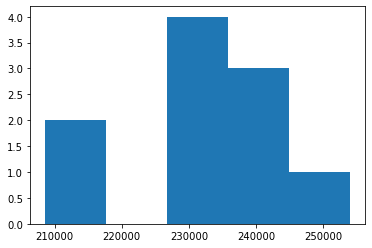

In [17]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(10):
    n = 102
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
step_size = [i for i in step_size if i < 999999999]
plt.hist(step_size, bins=5)
plt.show()
    

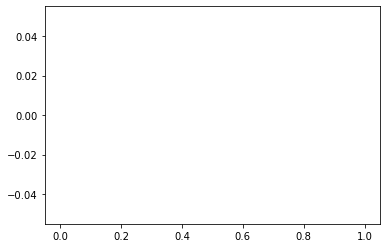

In [13]:
plt.hist([i for i in step_size if i < 20000], bins=5)
plt.show()

In [16]:
[i for i in step_size if i < 9999999]

[100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000]